In [1]:
import numpy as np
import matplotlib.pyplot as plt
from testCases_v2 import *
import sklearn
import sklearn.datasets
import sklearn.linear_model
from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets

%matplotlib inline

np.random.seed(1)

In [2]:
X, Y = load_planar_dataset()

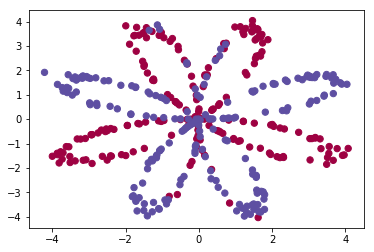

In [3]:
plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral)

In [5]:
print(X.shape)
print(Y.shape)

(2, 400)
(1, 400)


In [7]:
clf = sklearn.linear_model.LogisticRegression()
clf.fit(X.T, Y.T)

C:\Users\windo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Accuracy: 47.0%


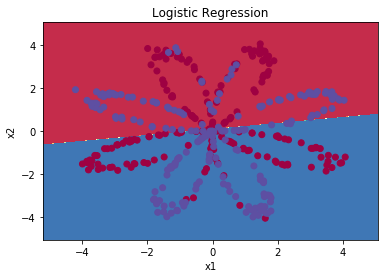

In [11]:
plot_decision_boundary(lambda x: clf.predict(x), X, Y)
plt.title("Logistic Regression")

print("Accuracy: {}%".format(clf.score(X.T, Y.T) * 100))

In [44]:
def layer_size(X, Y, hidden_layer_units):
    n_x = X.shape[0]
    n_h = hidden_layer_units
    n_y = Y.shape[0]
    
    return n_x, n_h, n_y
    
    
def initialize_params(n_x, n_h, n_y):
    
    np.random.seed(2)

    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y, 1))
    
    parameters = {
        "W1": W1,
        "b1": b1,
        "W2": W2,
        "b2": b2
    }
    
    return parameters
    
def forward_prop(X, parameters):
    Z1 = np.dot(parameters["W1"], X) + parameters["b1"]
    A1 = np.tanh(Z1)
    
    Z2 = np.dot(parameters["W2"], A1) + parameters["b2"]
    A2 = sigmoid(Z2)
    
    cache = {
        "A1": A1,
        "Z1": Z1,
        "A2": A2,
        "Z2": Z2
    }
    
    return cache

def compute_cost(Y, A2):
    m = Y.shape[1]

    cost = (np.multiply(np.log(A2), Y) + np.multiply(np.log(1-A2), 1-Y)) / m
    cost = - (np.sum(cost))
    
    cost = np.squeeze(cost)
    return cost

    
def back_prop(X, Y, cache, parameters):
    m = Y.shape[1]
    
    dZ2 = cache["A2"] - Y
    dW2 = np.dot(dZ2, cache["A1"].T) / m
    db2 = np.sum(dZ2, keepdims=True, axis=1) / m
    
    dZ1 = np.dot(parameters["W2"].T, dZ2) * (1 - np.power(cache["A1"], 2))
    dW1 = np.dot(dZ1, X.T) / m
    db1 = np.sum(dZ1, keepdims=True, axis=1) / m
    
    
    grads = {
        "dW1": dW1,
        "db1": db1,
        "dW2": dW2,
        "db2": db2
    }
    
    return grads

def update_params(parameters, grads, lr):
    parameters["W1"] = parameters["W1"] - (lr * grads["dW1"])
    parameters["b1"] = parameters["b1"] - (lr * grads["db1"])
    parameters["W2"] = parameters["W2"] - (lr * grads["dW2"])
    parameters["b2"] = parameters["b2"] - (lr * grads["db2"])
    
    return parameters
    

def nn_model(X, Y, hidden_layer_units, num_iter=10000, learning_rate=1.2, print_cost=False):
    np.random.seed(3)
    n_x, n_h, n_y = layer_size(X, Y, hidden_layer_units)
    
    parameters = initialize_params(n_x, n_h, n_y)
    
    for i in range(num_iter):
        cache = forward_prop(X, parameters)
        cost = compute_cost(Y, cache["A2"])
        grads = back_prop(X, Y, cache, parameters)
        parameters = update_params(parameters, grads, learning_rate)
        
        if print_cost:
            if i % 1000 == 0:
                print("Iteration: {}     Cost: {}".format(i, cost))
    
    return parameters

def predict(parameters, X):
    
    cache = forward_prop(X, parameters)
    predictions = np.where(cache["A2"]>0.5, 1, 0)
    
    return predictions

Iteration: 0     Cost: 0.6930480201239824
Iteration: 1000     Cost: 0.2880832935690184
Iteration: 2000     Cost: 0.2543854940732454
Iteration: 3000     Cost: 0.23386415038952205
Iteration: 4000     Cost: 0.22679248744854008
Iteration: 5000     Cost: 0.22264427549299015
Iteration: 6000     Cost: 0.21973140404281322
Iteration: 7000     Cost: 0.21750365405131294
Iteration: 8000     Cost: 0.21945618598055533
Iteration: 9000     Cost: 0.21855798425029602


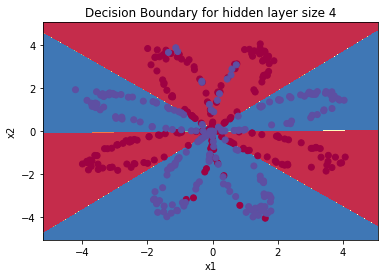

In [45]:
params = nn_model(X, Y, 4, print_cost=True)

plot_decision_boundary(lambda x: predict(params, x.T), X, Y)
plt.title("Decision Boundary for hidden layer size " + str(4))

In [46]:
predictions = predict(params, X)
print ('Accuracy: %d' % float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100) + '%')

Accuracy: 90%


Accuracy for 1 hidden units: 67.5 %
Accuracy for 2 hidden units: 67.25 %
Accuracy for 3 hidden units: 90.75 %
Accuracy for 4 hidden units: 90.5 %
Accuracy for 5 hidden units: 91.25 %
Accuracy for 20 hidden units: 90.0 %
Accuracy for 50 hidden units: 90.25 %


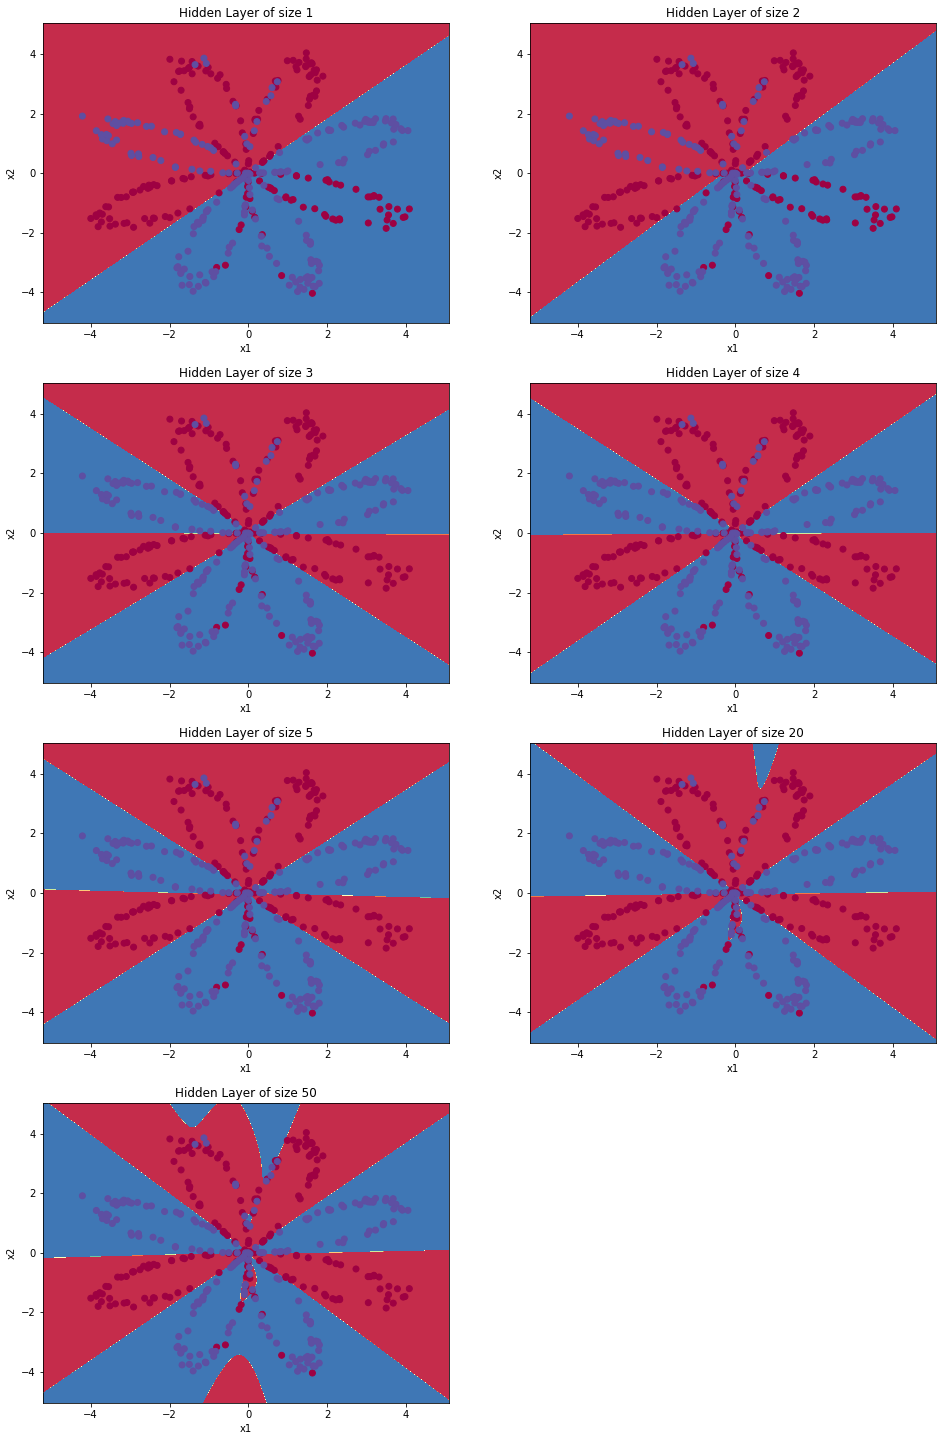

In [48]:
# This may take about 2 minutes to run

plt.figure(figsize=(16, 32))
hidden_layer_sizes = [1, 2, 3, 4, 5, 20, 50]
for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer of size %d' % n_h)
    parameters = nn_model(X, Y, n_h, num_iter = 5000)
    plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
    predictions = predict(parameters, X)
    accuracy = float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100)
    print ("Accuracy for {} hidden units: {} %".format(n_h, accuracy))